In [1]:
import os
os.getcwd()

'/Users/meghnathjaishi/Personal-Files/MeghJaishi-ML-Projects/Practical_Linear_Regression_Model_Python'

# import neccessary python libraries and frameworks

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Column Info

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.shape[1]

7

# Row Info

In [9]:
df.shape

(1338, 7)

In [10]:
len(df.index)

1338

In [11]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [12]:
len(df)

1338

In [13]:
df.shape[0]

1338

# data info
## Separating numerical data

In [14]:
num_data = df.select_dtypes(include=[np.number])

In [15]:
num_data.dtypes

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

In [16]:
num_data.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [17]:
#cat_data = df.select_dtypes(exclude=[np.number])

In [18]:
num_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [19]:
num_data.nunique()

age           47
bmi          548
children       6
charges     1337
dtype: int64

In [20]:
num_data.head(5)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [21]:
num_data.tail(5)

,age,bmi,children,charges
1333,50,30.97,3,10600.5483
1334,18,31.92,0,2205.9808
1335,18,36.85,0,1629.8335
1336,21,25.80,0,2007.9450
1337,61,29.07,0,29141.3603


In [22]:
num_data.shape

(1338, 4)

In [23]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [24]:
df.pivot_table(index = 'children', columns = 'region', values= 'charges', aggfunc= 'sum')

region,northeast,northwest,southeast,southwest
children,,,,
0,1.709090e+06,1.494817e+06,2.246649e+06,1.647514e+06
1,1.255886e+06,7.570390e+05,1.300269e+06,8.117058e+05
2,6.943728e+05,8.886448e+05,1.038079e+06,9.965587e+05
3,5.619866e+05,8.181634e+05,6.457446e+05,3.848904e+05
4,1.013964e+05,6.808211e+04,7.225512e+04,1.045328e+05
5,2.093692e+04,8.965796e+03,6.069265e+04,6.755327e+04


In [25]:
df.pivot_table(index='children', columns='smoker', values='charges', aggfunc=['mean','max','sum'])

mean                        max                        sum  \
smoker              no           yes           no          yes            no   
children                                                                       
0          7611.793335  31341.363954  30259.99556  63770.42801  3.493813e+06   
1          8303.109350  31822.654334  35160.13457  58571.07448  2.183718e+06   
2          9493.093674  33844.235755  36910.60803  49577.66240  1.756222e+06   
3          9614.519391  32724.915268  30063.58055  60021.39897  1.134513e+06   
4         12121.344408  26532.276933  36580.28216  40182.24600  2.666696e+05   
5          8183.845556  19023.260000  14478.33015  19023.26000  1.391254e+05   

                        
smoker             yes  
children                
0         3.604257e+06  
1         1.941182e+06  
2         1.861433e+06  
3         1.276272e+06  
4         7.959683e+04  
5         1.902326e+04

In [26]:
df.groupby('sex').agg({'charges':'mean'})

,charges
sex,
female,12569.578844
male,13956.751178


In [27]:
df.groupby('sex').agg({'charges':'count'})

,charges
sex,
female,662
male,676


In [28]:
df.groupby(['sex','region']).agg({'charges':'count'})

charges
sex    region            
female northeast      161
       northwest      164
       southeast      175
       southwest      162
male   northeast      163
       northwest      161
       southeast      189
       southwest      163

In [29]:
df.groupby(['sex']).agg({'charges':['sum','max','count']})

charges                   
                 sum          max count
sex                                    
female  8.321061e+06  63770.42801   662
male    9.434764e+06  62592.87309   676

In [30]:
df.groupby(['sex'])['bmi','charges'].describe(percentiles=[])

bmi                                              charges  \
        count       mean       std     min      50%    max   count   
sex                                                                  
female  662.0  30.377749  6.046023  16.815  30.1075  48.07   662.0   
male    676.0  30.943129  6.140435  15.960  30.6875  53.13   676.0   

                                                                        
                mean           std        min         50%          max  
sex                                                                     
female  12569.578844  11128.703801  1607.5101  9412.96250  63770.42801  
male    13956.751178  12971.025915  1121.8739  9369.61575  62592.87309

In [31]:
df.sort_values(by='region', ascending=False).head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
304,57,female,38.0,2,no,southwest,12646.207
861,38,female,28.0,3,no,southwest,7151.092
864,51,male,25.4,0,no,southwest,8782.469
865,40,male,29.9,2,no,southwest,6600.361


In [32]:
df['charges'].mean()

13270.422265141257

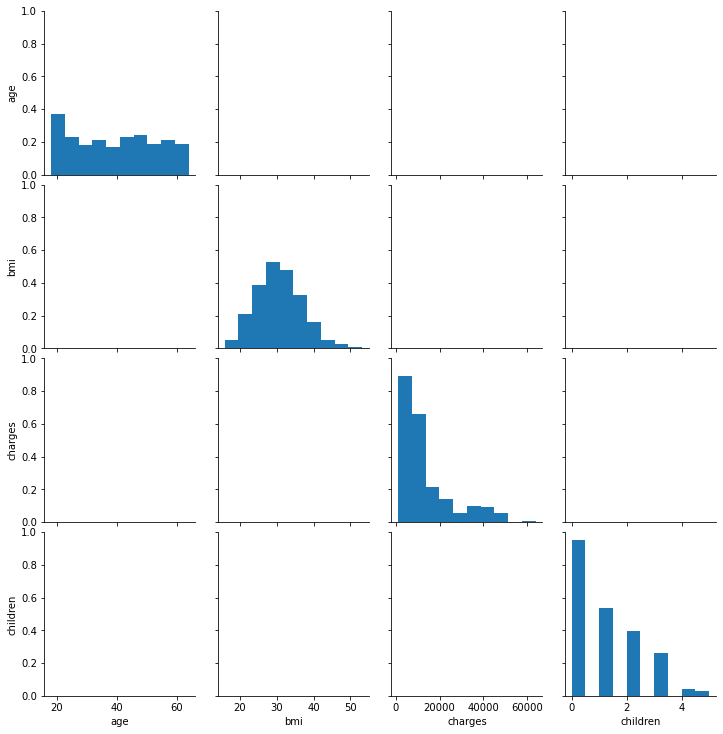

In [33]:
#pair plot to identify pair correlation
g = sns.PairGrid(df[['age','bmi','charges','children']])
g.map_diag(plt.hist)

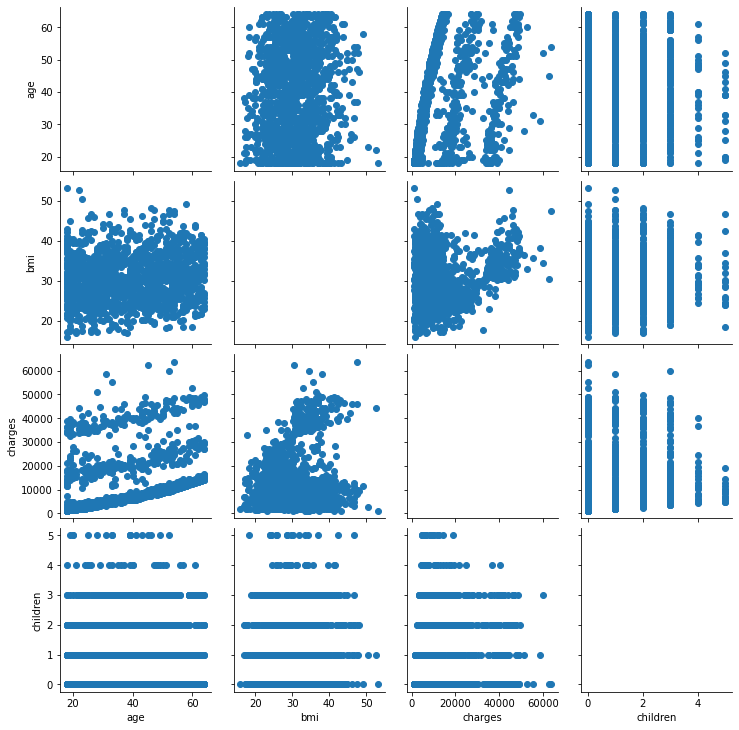

In [34]:
#pair plot to identify pair correlation
g = sns.PairGrid(df[['age','bmi','charges','children']])
g.map_offdiag(plt.scatter)

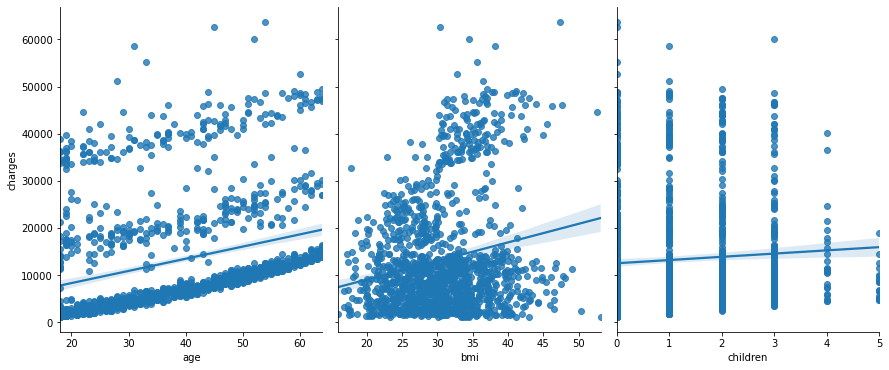

In [35]:
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars=['charges'],height=5, aspect=.8, kind="reg")

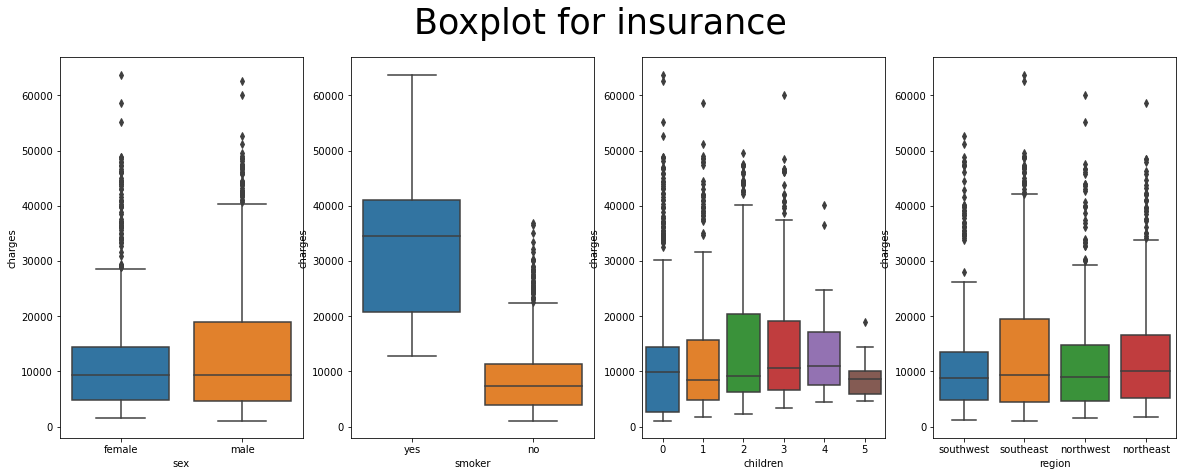

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,7))

fig.suptitle("Boxplot for insurance", fontsize=35)
sns.boxplot(x="sex", y="charges", data=df,ax=ax1)
sns.boxplot(x="smoker", y="charges", data=df,ax=ax2)
#sns.boxplot(x="bmi", y="charges", data=df,ax=ax3)
sns.boxplot(x="children", y="charges", data=df,ax=ax3)
sns.boxplot(x="region", y="charges", data=df,ax=ax4)

## Separating categorical data

In [37]:
cat_data = df.select_dtypes(include=['object'])
#cat_data = df.select_dtypes(include=['category'])

In [38]:
cat_data.dtypes

sex       object
smoker    object
region    object
dtype: object

In [39]:
cat_data.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [40]:
df['sex'].value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

In [41]:
cat_data['smoker'].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [42]:
cat_data['region'].value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [43]:
cat_data.nunique()

sex       2
smoker    2
region    4
dtype: int64

In [44]:
cat_data.values[5] # value at fifth row

array(['female', 'no', 'southeast'], dtype=object)

In [45]:
cat_data.describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [46]:
cat_data.sort_values(by ='smoker').head()

,sex,smoker,region
556,male,no,northeast
724,female,no,northeast
1197,male,no,southeast
726,male,no,northwest
728,female,no,northeast


In [47]:
df['sex'].min()

'female'

In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [49]:
df['sex'].max()

'male'

In [50]:
cat_data['smoker'].min()

'no'

In [51]:
cat_data['smoker'].max()

'yes'

In [52]:
pd.crosstab(index=df['sex'],columns=df['smoker'],margins=True)

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


In [53]:
pd.crosstab(index=df['region'],columns=df['smoker'],margins=True)

smoker,no,yes,All
region,,,
northeast,257,67,324
northwest,267,58,325
southeast,273,91,364
southwest,267,58,325
All,1064,274,1338


In [54]:
pd.crosstab(index=df['region'],columns=df['smoker'],margins=True, normalize=True)

smoker,no,yes,All
region,,,
northeast,0.192078,0.050075,0.242152
northwest,0.199552,0.043348,0.242900
southeast,0.204036,0.068012,0.272048
southwest,0.199552,0.043348,0.242900
All,0.795217,0.204783,1.000000


In [55]:
pd.crosstab(index=df['region'],columns=df['sex'],margins=True)

sex,female,male,All
region,,,
northeast,161,163,324
northwest,164,161,325
southeast,175,189,364
southwest,162,163,325
All,662,676,1338


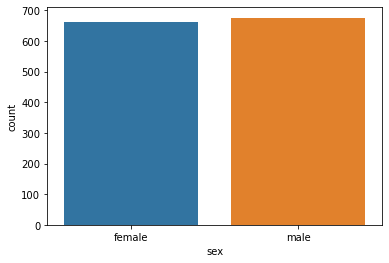

In [56]:
sns.countplot(x='sex', data=df)

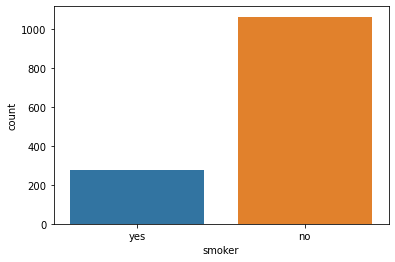

In [57]:
sns.countplot(x='smoker', data=cat_data)

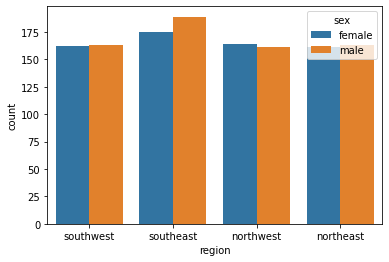

In [58]:
sns.countplot(x='region', hue='sex', data=df)

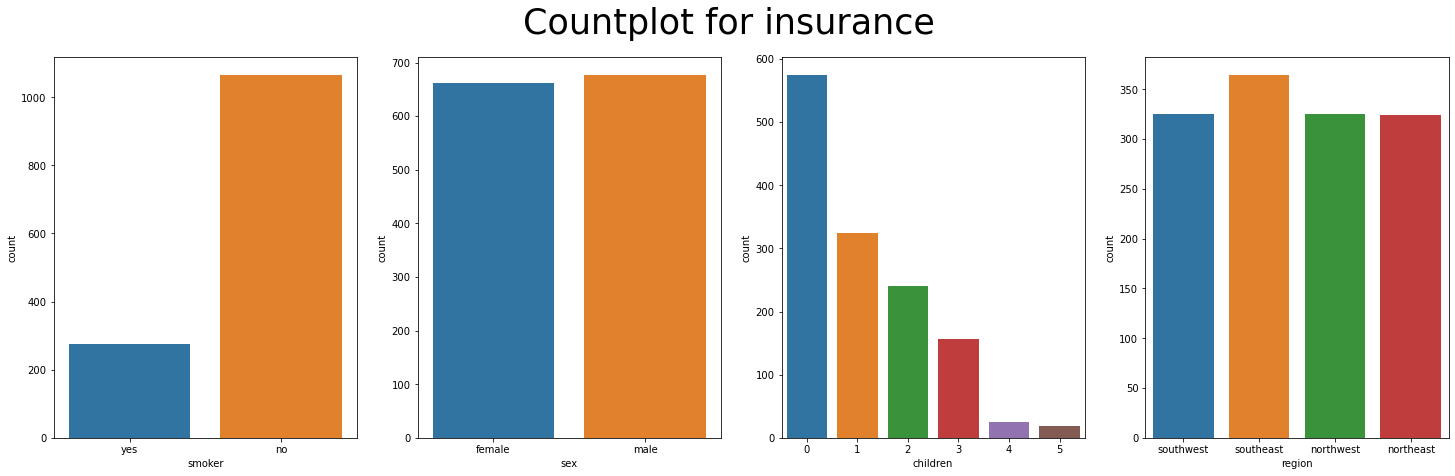

In [59]:
## Countplot for categorical variables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,7))

fig.suptitle("Countplot for insurance", fontsize=35)

sns.countplot(x="smoker", data=df,ax=ax1)
sns.countplot(x="sex", data=df,ax=ax2)
sns.countplot(x="children", data=df,ax=ax3)
sns.countplot(x="region", data=df,ax=ax4)

In [60]:
## correlation matrix
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,age,bmi,children,charges
age,1.00,0.11,0.04,0.30
bmi,0.11,1.00,0.01,0.20
children,0.04,0.01,1.00,0.07
charges,0.30,0.20,0.07,1.00


# Record Analysis

In [61]:
df.iloc[100:200,0:3]

,age,sex,bmi
100,41,female,31.600
101,30,male,25.460
102,18,female,30.115
103,61,female,29.920
104,34,female,27.500
...,...,...,...
195,19,male,30.590
196,39,female,32.800
197,45,female,28.600
198,51,female,18.050


In [62]:
df.iloc[-1:]

,age,sex,bmi,children,smoker,region,charges
1337,61,female,29.07,0,yes,northwest,29141.3603


In [63]:
df[-1:]

,age,sex,bmi,children,smoker,region,charges
1337,61,female,29.07,0,yes,northwest,29141.3603


In [64]:
df.tail(1)

,age,sex,bmi,children,smoker,region,charges
1337,61,female,29.07,0,yes,northwest,29141.3603


In [65]:
# apply function to each column
df.apply(np.max)

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object

In [66]:
# apply column to each row
df[df['region'].apply(lambda region: region[0]=='s')].head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896


In [67]:
# mapping male -> 1, female -> 0
d = {"male": 1, "female": 0}
df["sex"]=df["sex"].map(d)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


# null values and missing values

In [68]:
# null values columnwise
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [69]:
# total null values in df
df.isnull().sum().sum()

0

In [70]:
# drop full rows having any null values
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [77]:
# drop full columns having any null values
df.dropna(axis='columns')

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [78]:
df.dropna(axis='columns', how = 'any')

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [79]:
# if all values of column are null then delete it
df.dropna(axis='columns', how = 'all')

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [80]:
df.dropna(axis='rows', thresh =3)
df.dropna(axis=0, thresh=3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [81]:
df.fillna(0)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [82]:
df.fillna(-99)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [83]:
# forward fill
df.fillna(method='ffill')

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [84]:
# backward fill
df.fillna(method='bfill')

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [85]:
df.fillna(method='ffill', limit=1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [86]:
# null values columns wise
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [88]:
df.fillna(0, inplace=True)

In [89]:
df.replace(np.nan,0)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [90]:
# replace nan by Kathmandu
df["bmi"].fillna("Kathmandu", inplace=True)

In [91]:
print(df.fillna({'age': -99, 'sex' : "unspecified", 'smoke': "nonhabitual-smoker"}))

      age  sex     bmi  children smoker     region      charges
0      19    0  27.900         0    yes  southwest  16884.92400
1      18    1  33.770         1     no  southeast   1725.55230
2      28    1  33.000         3     no  southeast   4449.46200
3      33    1  22.705         0     no  northwest  21984.47061
4      32    1  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    1  30.970         3     no  northwest  10600.54830
1334   18    0  31.920         0     no  northeast   2205.98080
1335   18    0  36.850         0     no  southeast   1629.83350
1336   21    0  25.800         0     no  southwest   2007.94500
1337   61    0  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [92]:
print(df.fillna(df.median()))

      age  sex     bmi  children smoker     region      charges
0      19    0  27.900         0    yes  southwest  16884.92400
1      18    1  33.770         1     no  southeast   1725.55230
2      28    1  33.000         3     no  southeast   4449.46200
3      33    1  22.705         0     no  northwest  21984.47061
4      32    1  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    1  30.970         3     no  northwest  10600.54830
1334   18    0  31.920         0     no  northeast   2205.98080
1335   18    0  36.850         0     no  southeast   1629.83350
1336   21    0  25.800         0     no  southwest   2007.94500
1337   61    0  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [93]:
# mode returns dataframe so iloc[0] returns row
print(df.fillna(df.mode().iloc[0]))

      age  sex     bmi  children smoker     region      charges
0      19    0  27.900         0    yes  southwest  16884.92400
1      18    1  33.770         1     no  southeast   1725.55230
2      28    1  33.000         3     no  southeast   4449.46200
3      33    1  22.705         0     no  northwest  21984.47061
4      32    1  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    1  30.970         3     no  northwest  10600.54830
1334   18    0  31.920         0     no  northeast   2205.98080
1335   18    0  36.850         0     no  southeast   1629.83350
1336   21    0  25.800         0     no  southwest   2007.94500
1337   61    0  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [64]:
pip install missingno

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [94]:
import missingno as msno

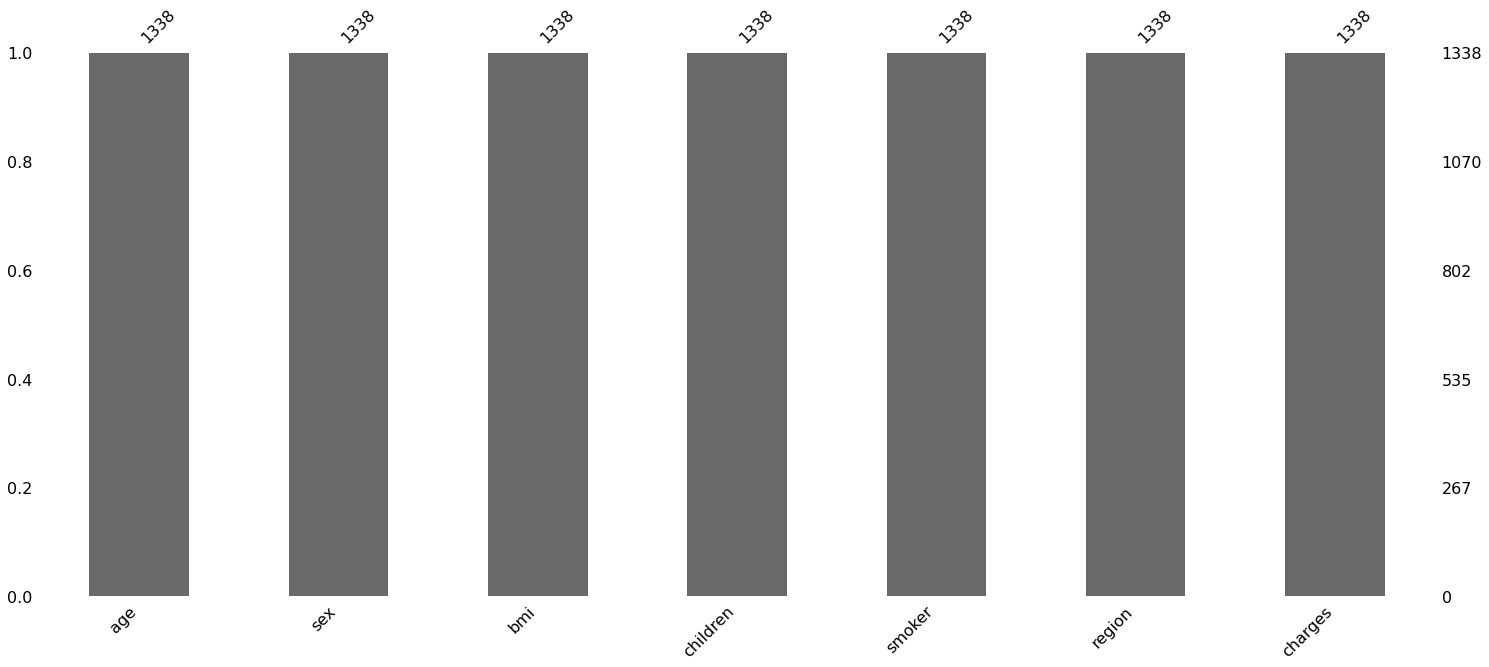

In [96]:
# different in height indicates missing values
msno.bar(df);

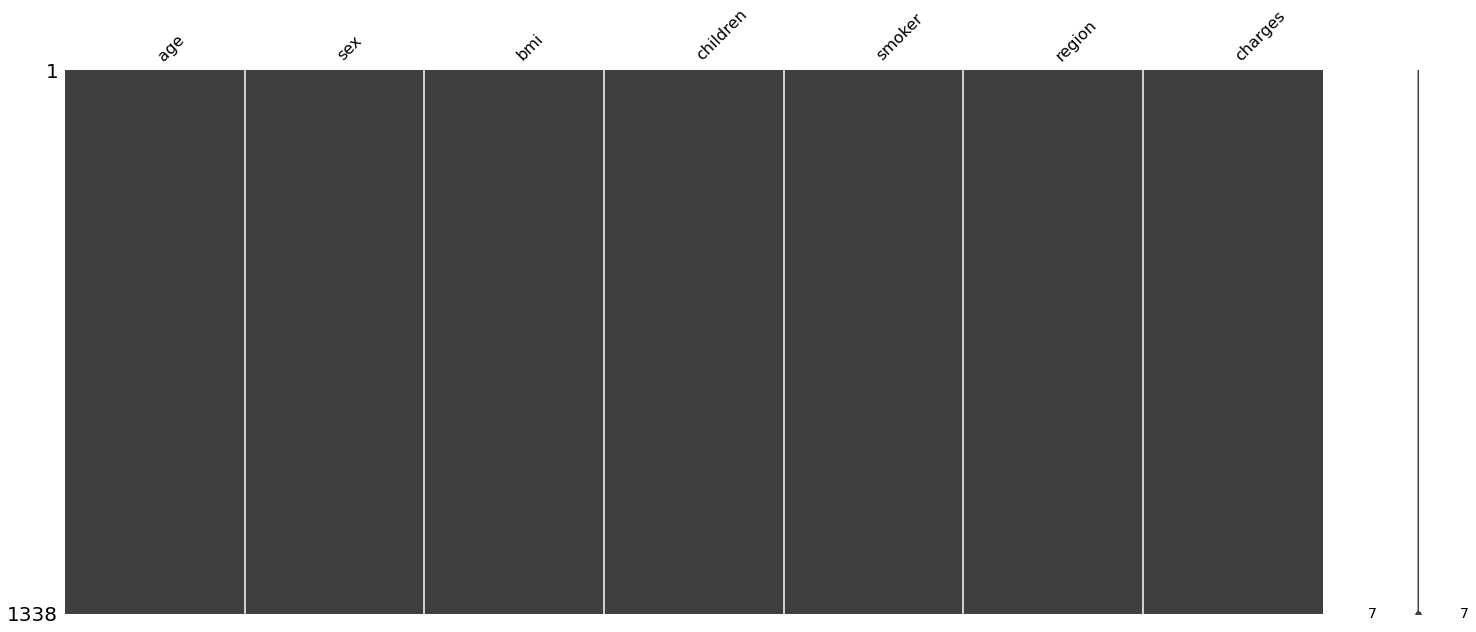

In [97]:
# White regions indicates missing values
msno.matrix(df);

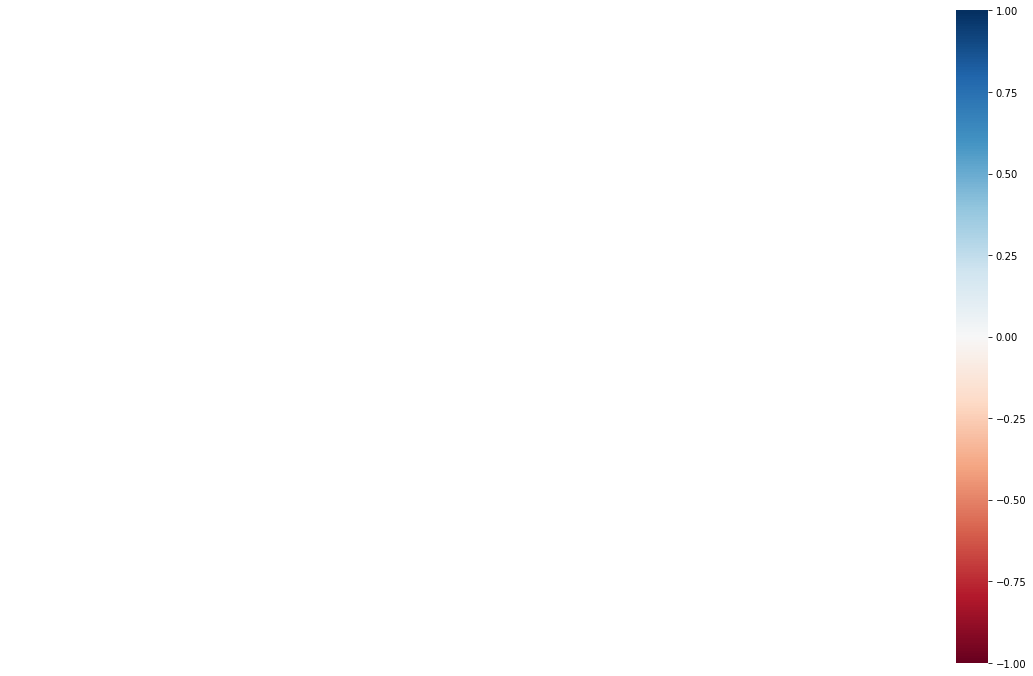

In [98]:
# heatmap of missing values
msno.heatmap(df);

In [99]:
df['age'] = df['age'].astype(float)

In [100]:
df['age'] = df['age'].fillna(df['age'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 73.3+ KB


In [101]:
updated_df = df
updated_df['Ageismissing'] = updated_df['age'].isnull()
from sklearn.impute import SimpleImputer
My_Imputer = SimpleImputer(missing_values='NAN',strategy='constant', fill_value='medium-age')
data_new = My_Imputer.fit_transform(updated_df)
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   float64
 1   sex           1338 non-null   int64  
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   Ageismissing  1338 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 74.6+ KB


In [102]:
%pwd

'/Users/meghnathjaishi/Personal-Files/MeghJaishi-ML-Projects/Practical_Linear_Regression_Model_Python'

In [103]:
sex_data = df.select_dtypes(include=['bool'])

In [104]:
sex_data.columns

Index(['Ageismissing'], dtype='object')

In [105]:
num_data.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [106]:
df['sex'].dtypes

dtype('int64')